In [1]:
import os, sys
sys.path.append("..")

In [2]:
import numpy as np
from opttrot.hamiltonian import Hamiltonian
from qiskit.quantum_info import SparsePauliOp

def get_test_hermit(qubits, tol= 0.5):
    ndim = int(2**qubits)
    A = np.random.rand(ndim, ndim)
    A[A<tol] = 0.
    H = A + 1j*A
    H = H.conj()@H
    return H

In [3]:
# Sample Hamiltonian
qubit = 3
H = get_test_hermit(qubit, tol=0.3)

In [4]:
hamiltonian = Hamiltonian.from_matrix(H)

In [5]:
hamiltonian

PauliPoly(terms:64)[
((3.5037335832709444+1.3668749206237956e-17j), 'III'),
((3.6148874567810196+1.8967212846511713e-17j), 'IIX'),
((3.6539161163152807+3.2562455971995736e-17j), 'IXI'),
((3.2857378908821264-1.5229845113056796e-17j), 'IXX'),
((3.4513409991787154-2.816237053539686e-17j), 'XII'),
((3.1292554241277393-3.630111905640049e-18j), 'XIX'),
((3.1782786157143894+5.761715892802475e-19j), 'XXI'),
((3.229290560410796-2.6158686776212692e-17j), 'XXX'),
((1.6979739217025752e-17+0.23271615428108028j), 'IIY'),
((-0.05944082142302465-1.6934656777909056e-17j), 'IIZ'),
((-9.342145542588783e-19-0.3082072781509675j), 'IXY'),
((-0.3153772734529814-5.739585437440625e-18j), 'IXZ'),
((9.546661283729378e-18-0.13331328656849317j), 'XIY'),
((-0.16972698542014042-1.4943510151600434e-18j), 'XIZ'),
((-1.5142750352115025e-20+0.41033115929853503j), 'XXY'),
((-0.041660811390292096+1.529944997252259e-17j), 'XXZ'),
((-6.6115385061362065e-18-0.2563863581771113j), 'IYI'),
((4.763558891797653e-18-0.189079409474

In [6]:
spa = SparsePauliOp.from_operator(H)

63.2 ms ± 7.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


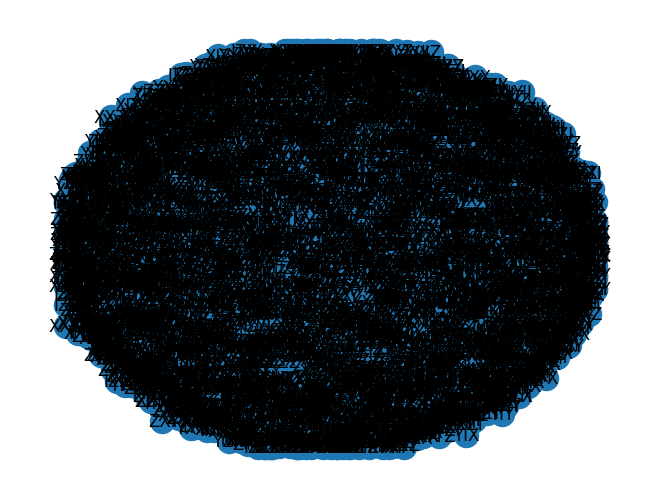

In [13]:
%%timeit
hamiltonian.draw_graph(with_labels=True)

In [9]:
import rustworkx as rx

In [10]:
g = spa.noncommutation_graph(False)

1.61 s ± 57.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


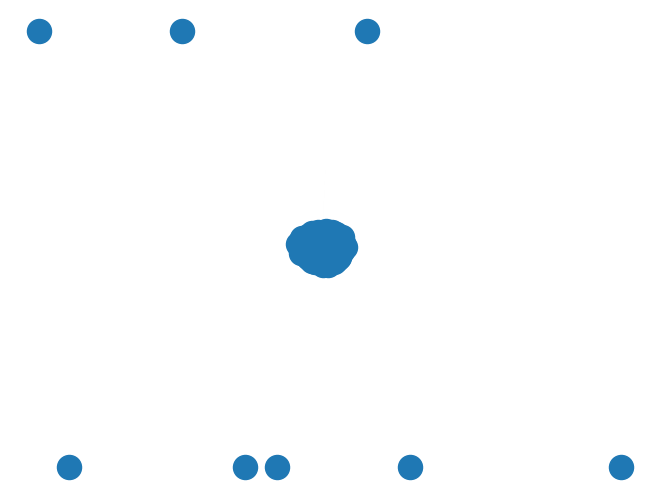

In [12]:
%%timeit
rx.visualization.mpl_draw(g)